In [14]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pycocotools.coco import COCO


In [15]:
annotation_file = r"E:\VisionExtract\data\annotations\instances_train2017.json"
coco = COCO(annotation_file)

print("Dataset loaded successfully")


loading annotations into memory...
Done (t=38.27s)
creating index...
index created!
Dataset loaded successfully


In [16]:
cat_ids = coco.getCatIds(catNms=['person'])
img_ids = coco.getImgIds(catIds=cat_ids)

print("Total images containing person:", len(img_ids))


Total images containing person: 64115


In [17]:
random_img_ids = random.sample(img_ids, 5)
print(random_img_ids)


[230863, 318241, 77721, 117156, 184703]


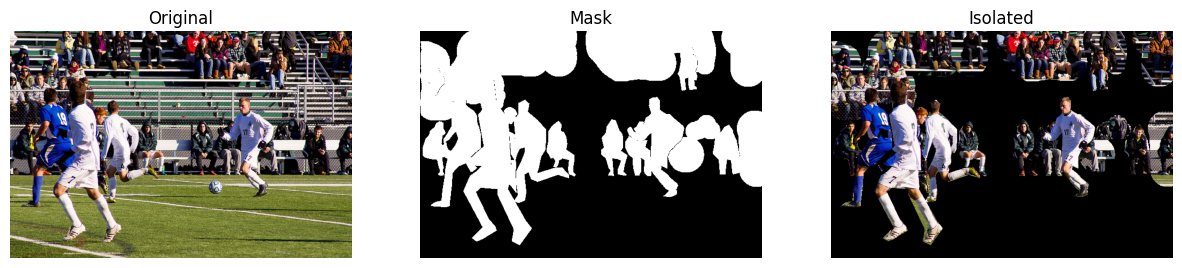

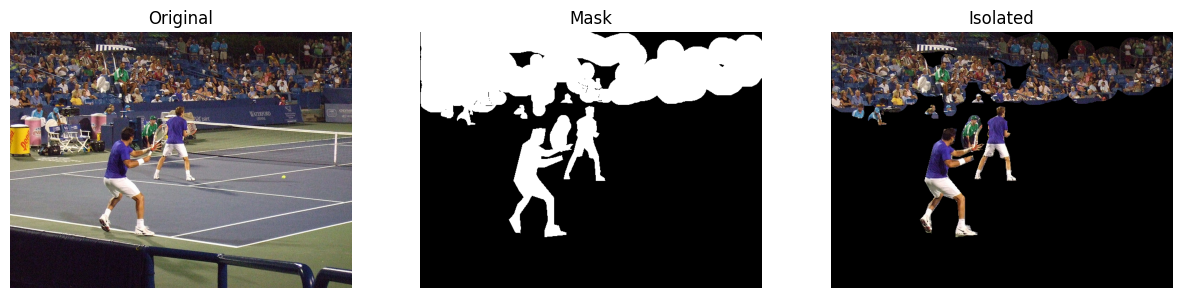

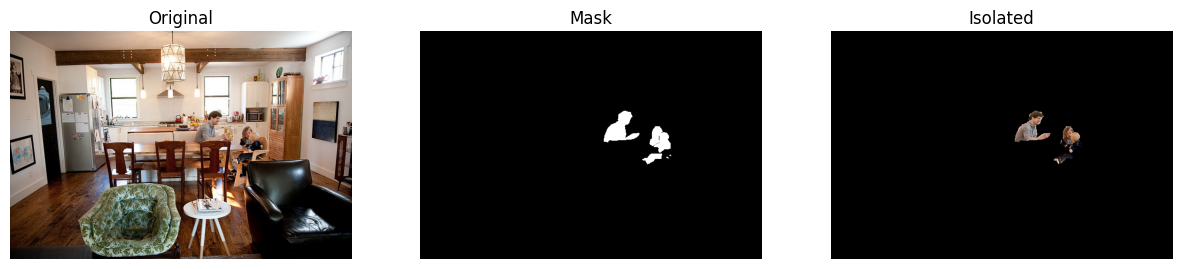

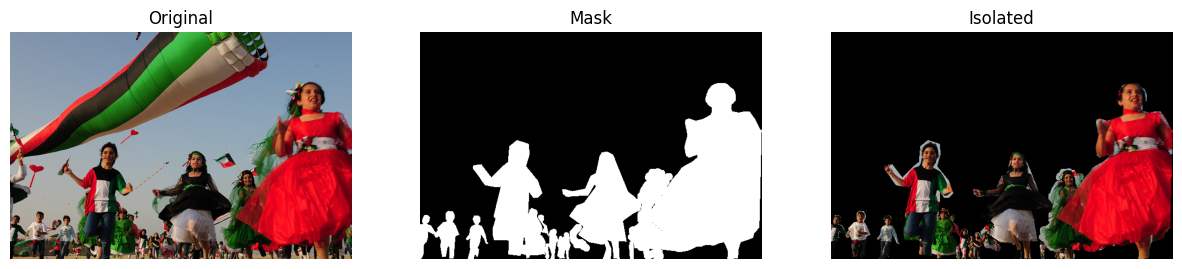

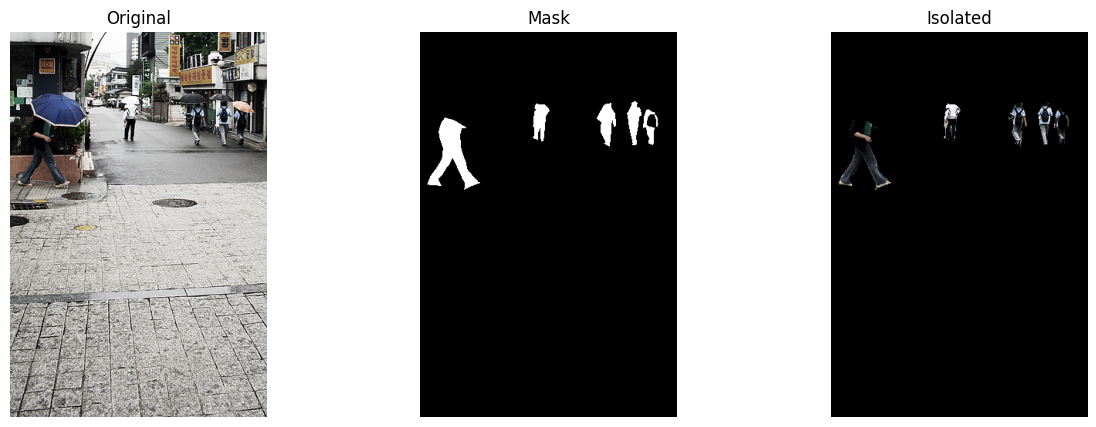

In [18]:
for img_id in random_img_ids:
    
    img_info = coco.loadImgs(img_id)[0]
    
    img_path = os.path.join(r"E:\VisionExtract\data\train2017", 
                            img_info['file_name'])

    image = Image.open(img_path).convert("RGB")
    image_np = np.array(image)

    ann_ids = coco.getAnnIds(imgIds=img_info['id'], 
                             catIds=cat_ids, 
                             iscrowd=None)
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info['height'], img_info['width']))

    for ann in anns:
        mask += coco.annToMask(ann)

    mask = np.clip(mask, 0, 1)
    binary_mask = (mask > 0).astype(np.uint8)

    isolated = image_np * binary_mask[:, :, None]

    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(image_np)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(isolated)
    plt.title("Isolated")
    plt.axis("off")

    plt.show()


In [19]:
def isolate_person_image(img_id):
    
    img_info = coco.loadImgs(img_id)[0]
    
    img_path = os.path.join(
        r"E:\VisionExtract\data\train2017",
        img_info['file_name']
    )

    image = Image.open(img_path).convert("RGB")
    image_np = np.array(image)

    ann_ids = coco.getAnnIds(
        imgIds=img_info['id'],
        catIds=cat_ids,
        iscrowd=None
    )
    
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info['height'], img_info['width']))

    for ann in anns:
        mask += coco.annToMask(ann)

    mask = np.clip(mask, 0, 1)
    binary_mask = (mask > 0).astype(np.uint8)

    isolated = image_np * binary_mask[:, :, None]

    return image_np, binary_mask, isolated, img_info['id']


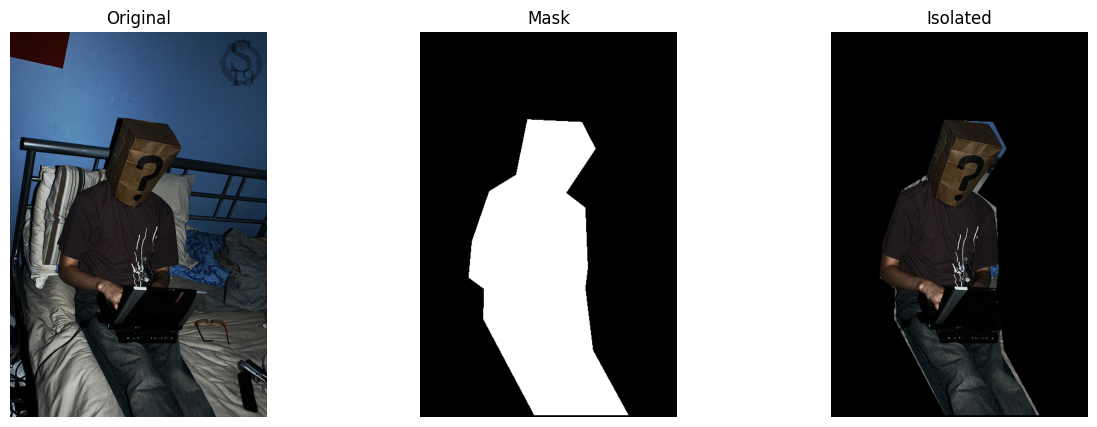

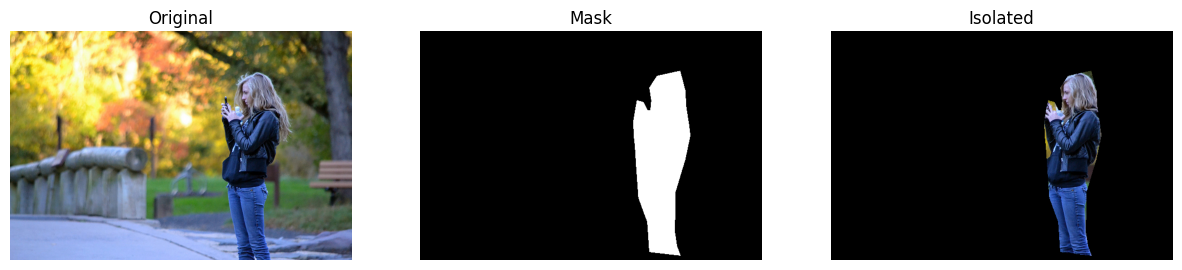

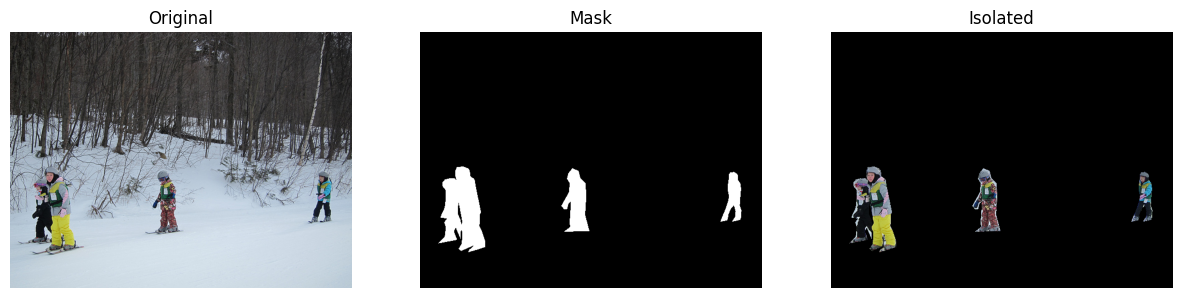

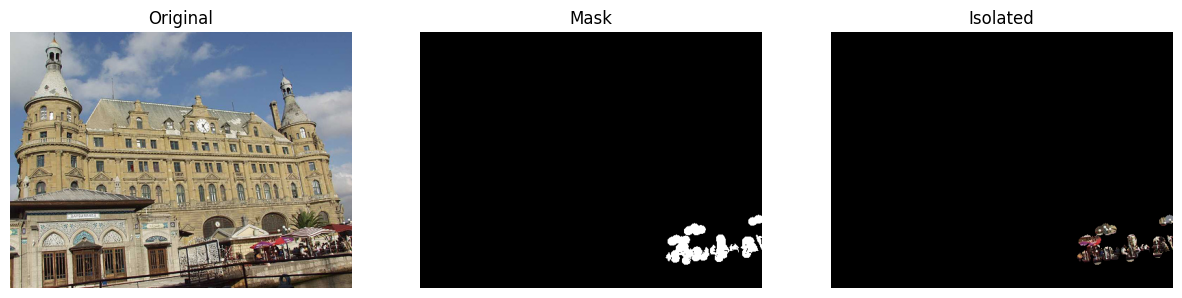

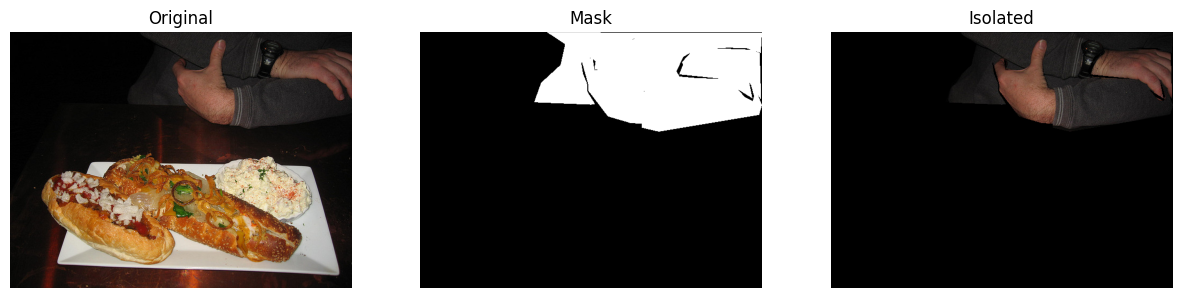

In [20]:
output_dir = r"E:\VisionExtract\outputs"

random_img_ids = random.sample(img_ids, 5)

for img_id in random_img_ids:
    
    image_np, binary_mask, isolated, image_id = isolate_person_image(img_id)

    # Save mask
    plt.imsave(
        os.path.join(output_dir, f"{image_id}_mask.png"),
        binary_mask,
        cmap='gray'
    )

    # Save isolated image
    Image.fromarray(isolated).save(
        os.path.join(output_dir, f"{image_id}_isolated.png")
    )

    # Display
    plt.figure(figsize=(15,5))

    plt.subplot(1,3,1)
    plt.imshow(image_np)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(isolated)
    plt.title("Isolated")
    plt.axis("off")

    plt.show()
